# Validating regridded ERA5-land data

Validating the ERA5-land data regridded onto WRF grid using [my own script](https://github.com/hengxiao80/regrid_era5land.git).

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import colorcet as cc
import cartopy.crs as crs

# import glob

from netCDF4 import Dataset as ds
import xarray as xr
import cftime
from datetime import datetime
# from netCDF4 import MFDataset as mfds

In [2]:
era5_dir = "/ccs/home/h1x/scratchp/wrfhydro_cacti/era5-land/regridded"
era5o_dir = "/ccs/home/h1x/scratchp/wrfhydro_cacti/era5-land/no_lake_data"
wrf_dir = "/ccs/home/h1x/scratchp/wrfhydro_cacti/wrfhydro_run/run01/out"
geogrid = ds('/ccs/home/h1x/scratchp/wrfhydro_cacti/geogrid/geo_em.d01.nc')

## First Layer Soil Moisture and Temperature

### 2018/10/26

In [3]:
t = "201810260000"
wrf = ds("{:s}/{:s}.LDASOUT_DOMAIN1".format(wrf_dir, t))
era5o = ds("{:s}/ecmf_{:s}_an_sfc_unpacked.nc".format(era5o_dir, t[0:8]))
wrf_lats = geogrid['XLAT_M'][0,:,:]
wrf_lons = geogrid['XLONG_M'][0,:,:]
era5_lons, era5_lats = np.meshgrid(era5o['longitude'], era5o['latitude'])
it = cftime.date2index(datetime.strptime(t, "%Y%m%d%H%M%S"), era5o['time'])
swvl1_era = ds("{:s}/swvl1_{:s}.nc".format(era5_dir, t))['swvl1'][:]
# swvl2_era = ds("{:s}/swvl2_{:s}.nc".format(era5_dir, t))['swvl2'][:]
# swvl3_era = ds("{:s}/swvl3_{:s}.nc".format(era5_dir, t))['swvl3'][:]
# swvl4_era = ds("{:s}/swvl4_{:s}.nc".format(era5_dir, t))['swvl4'][:]
stl1_era = ds("{:s}/stl1_{:s}.nc".format(era5_dir, t))['stl1'][:]
# stl2_era = ds("{:s}/stl2_{:s}.nc".format(era5_dir, t))['stl2'][:]
# stl3_era = ds("{:s}/stl3_{:s}.nc".format(era5_dir, t))['stl3'][:]
# stl4_era = ds("{:s}/stl4_{:s}.nc".format(era5_dir, t))['stl4'][:]

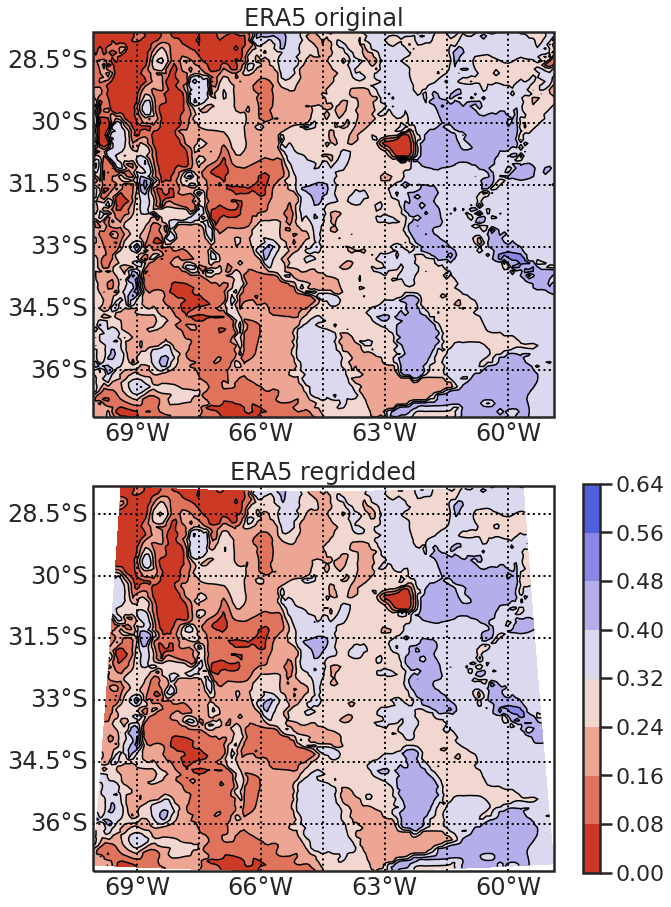

In [4]:
sns.set()
sns.set_context('poster')
sns.set_style('ticks')

levs = np.arange(0., 0.65, 0.08)
# levs = None

fig = plt.figure(figsize=(8, 18))

ax1 = fig.add_axes([0.05, 0.05, 0.8, 0.4], projection=crs.PlateCarree())
ax1.contour(wrf_lons, wrf_lats, swvl1_era[0,:,:],
            levels=levs,
            linewidths = 1.5,
            colors="black")
ct = ax1.contourf(wrf_lons, wrf_lats, swvl1_era[0,:,:], 
            levels=levs,
            extend='neither',
            cmap=cc.cm.coolwarm_r)
ax1.set_xlim(wrf_lons.min(), wrf_lons.max())
ax1.set_ylim(wrf_lats.min(), wrf_lats.max())
gl1 = ax1.gridlines(color="black", linestyle="dotted", draw_labels=True, x_inline=False, y_inline=False)
gl1.right_labels = False
gl1.top_labels = False 
ax1.set_title('ERA5 regridded')
ax2 = fig.add_axes([0.05, 0.4, 0.8, 0.4], projection=crs.PlateCarree())
ax2.contour(era5_lons, era5_lats, era5o['swvl1'][it,:,:],
            levels=levs,
            linewidths = 1.5,
            colors="black")
ax2.contourf(era5_lons, era5_lats, era5o['swvl1'][it,:,:],
            levels=levs,
            extend='neither',
            cmap=cc.cm.coolwarm_r)
ax2.set_xlim(wrf_lons.min(), wrf_lons.max())
ax2.set_ylim(wrf_lats.min(), wrf_lats.max())
gl2 = ax2.gridlines(color="black", linestyle="dotted", draw_labels=True, x_inline=False, y_inline=False)
gl2.right_labels = False
gl2.top_labels = False 
ax2.set_title('ERA5 original')
cax = fig.add_axes([0.9, 0.1, 0.03, 0.3])
plt.colorbar(ct, cax=cax)
plt.show()

### 2019/03/15

In [5]:
t = "201903150000"
wrf = ds("{:s}/{:s}.LDASOUT_DOMAIN1".format(wrf_dir, t))
era5o = ds("{:s}/ecmf_{:s}_an_sfc_unpacked.nc".format(era5o_dir, t[0:8]))
wrf_lats = geogrid['XLAT_M'][0,:,:]
wrf_lons = geogrid['XLONG_M'][0,:,:]
era5_lons, era5_lats = np.meshgrid(era5o['longitude'], era5o['latitude'])
it = cftime.date2index(datetime.strptime(t, "%Y%m%d%H%M%S"), era5o['time'])
swvl1_era = ds("{:s}/swvl1_{:s}.nc".format(era5_dir, t))['swvl1'][:]
# swvl2_era = ds("{:s}/swvl2_{:s}.nc".format(era5_dir, t))['swvl2'][:]
# swvl3_era = ds("{:s}/swvl3_{:s}.nc".format(era5_dir, t))['swvl3'][:]
# swvl4_era = ds("{:s}/swvl4_{:s}.nc".format(era5_dir, t))['swvl4'][:]
stl1_era = ds("{:s}/stl1_{:s}.nc".format(era5_dir, t))['stl1'][:]
# stl2_era = ds("{:s}/stl2_{:s}.nc".format(era5_dir, t))['stl2'][:]
# stl3_era = ds("{:s}/stl3_{:s}.nc".format(era5_dir, t))['stl3'][:]
# stl4_era = ds("{:s}/stl4_{:s}.nc".format(era5_dir, t))['stl4'][:]

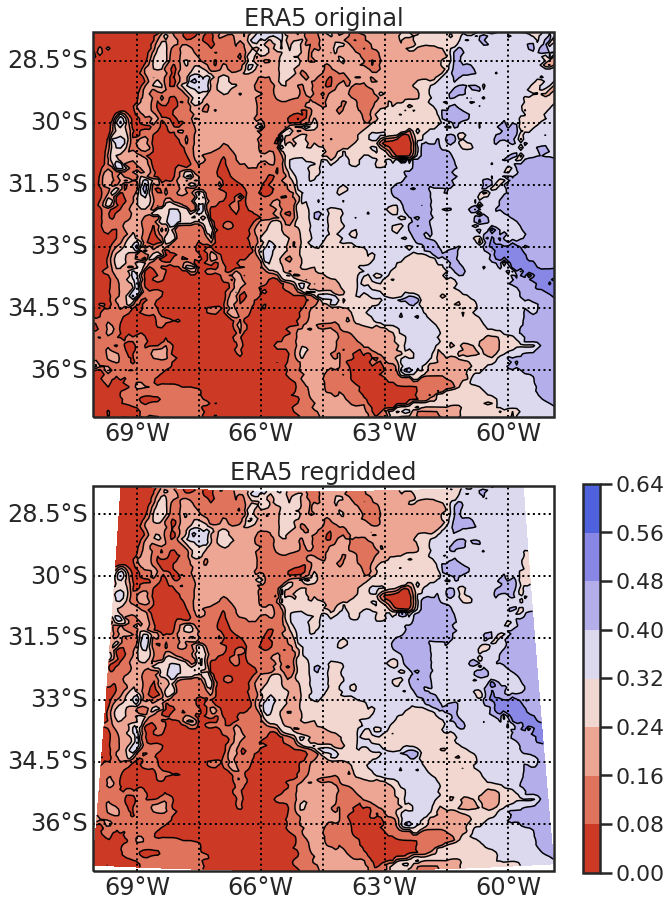

In [6]:
sns.set()
sns.set_context('poster')
sns.set_style('ticks')

levs = np.arange(0., 0.65, 0.08)
# levs = None

fig = plt.figure(figsize=(8, 18))

ax1 = fig.add_axes([0.05, 0.05, 0.8, 0.4], projection=crs.PlateCarree())
ax1.contour(wrf_lons, wrf_lats, swvl1_era[0,:,:],
            levels=levs,
            linewidths = 1.5,
            colors="black")
ct = ax1.contourf(wrf_lons, wrf_lats, swvl1_era[0,:,:], 
            levels=levs,
            extend='neither',
            cmap=cc.cm.coolwarm_r)
ax1.set_xlim(wrf_lons.min(), wrf_lons.max())
ax1.set_ylim(wrf_lats.min(), wrf_lats.max())
gl1 = ax1.gridlines(color="black", linestyle="dotted", draw_labels=True, x_inline=False, y_inline=False)
gl1.right_labels = False
gl1.top_labels = False 
ax1.set_title('ERA5 regridded')
ax2 = fig.add_axes([0.05, 0.4, 0.8, 0.4], projection=crs.PlateCarree())
ax2.contour(era5_lons, era5_lats, era5o['swvl1'][it,:,:],
            levels=levs,
            linewidths = 1.5,
            colors="black")
ax2.contourf(era5_lons, era5_lats, era5o['swvl1'][it,:,:],
            levels=levs,
            extend='neither',
            cmap=cc.cm.coolwarm_r)
ax2.set_xlim(wrf_lons.min(), wrf_lons.max())
ax2.set_ylim(wrf_lats.min(), wrf_lats.max())
gl2 = ax2.gridlines(color="black", linestyle="dotted", draw_labels=True, x_inline=False, y_inline=False)
gl2.right_labels = False
gl2.top_labels = False 
ax2.set_title('ERA5 original')
cax = fig.add_axes([0.9, 0.1, 0.03, 0.3])
plt.colorbar(ct, cax=cax)
plt.show()

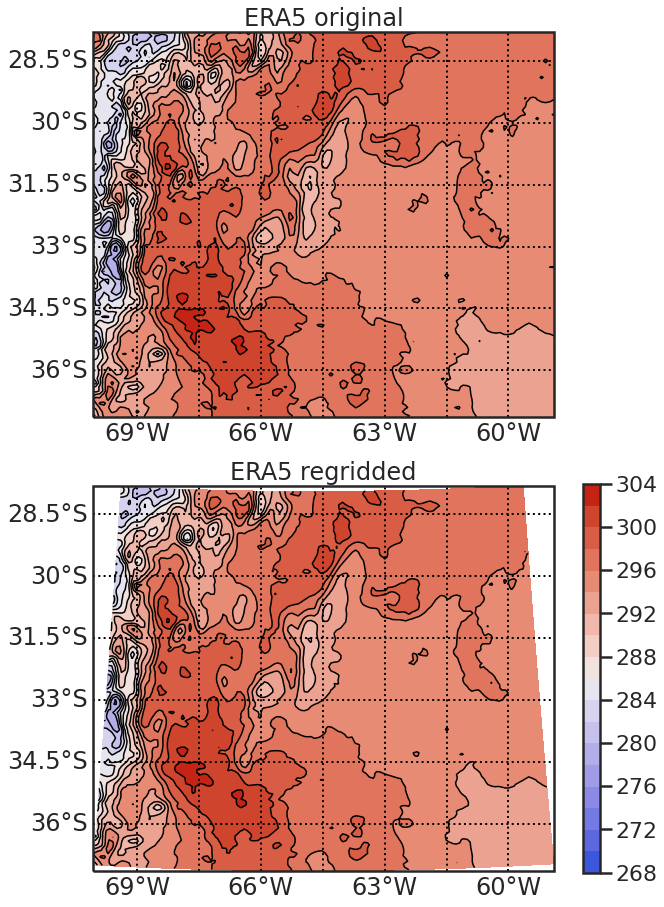

In [7]:
sns.set()
sns.set_context('poster')
sns.set_style('ticks')

levs = None
levs = np.arange(268., 304.1, 2.)

fig = plt.figure(figsize=(8, 18))

ax1 = fig.add_axes([0.05, 0.05, 0.8, 0.4], projection=crs.PlateCarree())
ax1.contour(wrf_lons, wrf_lats, stl1_era[0,:,:],
            levels=levs,
            linewidths = 1.5,
            colors="black")
ct = ax1.contourf(wrf_lons, wrf_lats, stl1_era[0,:,:], 
            levels=levs,
            extend='neither',
            cmap=cc.cm.coolwarm)
ax1.set_xlim(wrf_lons.min(), wrf_lons.max())
ax1.set_ylim(wrf_lats.min(), wrf_lats.max())
gl1 = ax1.gridlines(color="black", linestyle="dotted", draw_labels=True, x_inline=False, y_inline=False)
gl1.right_labels = False
gl1.top_labels = False 
ax1.set_title('ERA5 regridded')
ax2 = fig.add_axes([0.05, 0.4, 0.8, 0.4], projection=crs.PlateCarree())
ax2.contour(era5_lons, era5_lats, era5o['stl1'][it,:,:],
            levels=levs,
            linewidths = 1.5,
            colors="black")
ax2.contourf(era5_lons, era5_lats, era5o['stl1'][it,:,:],
            levels=levs,
            extend='neither',
            cmap=cc.cm.coolwarm)
ax2.set_xlim(wrf_lons.min(), wrf_lons.max())
ax2.set_ylim(wrf_lats.min(), wrf_lats.max())
gl2 = ax2.gridlines(color="black", linestyle="dotted", draw_labels=True, x_inline=False, y_inline=False)
gl2.right_labels = False
gl2.top_labels = False 
ax2.set_title('ERA5 original')
cax = fig.add_axes([0.9, 0.1, 0.03, 0.3])
plt.colorbar(ct, cax=cax)
plt.show()